Name - Satyam Mishra
Reg no. 21bce8247

In [8]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('database/diabetes.csv')

In [4]:
data.shape()

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# data does not contain any null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

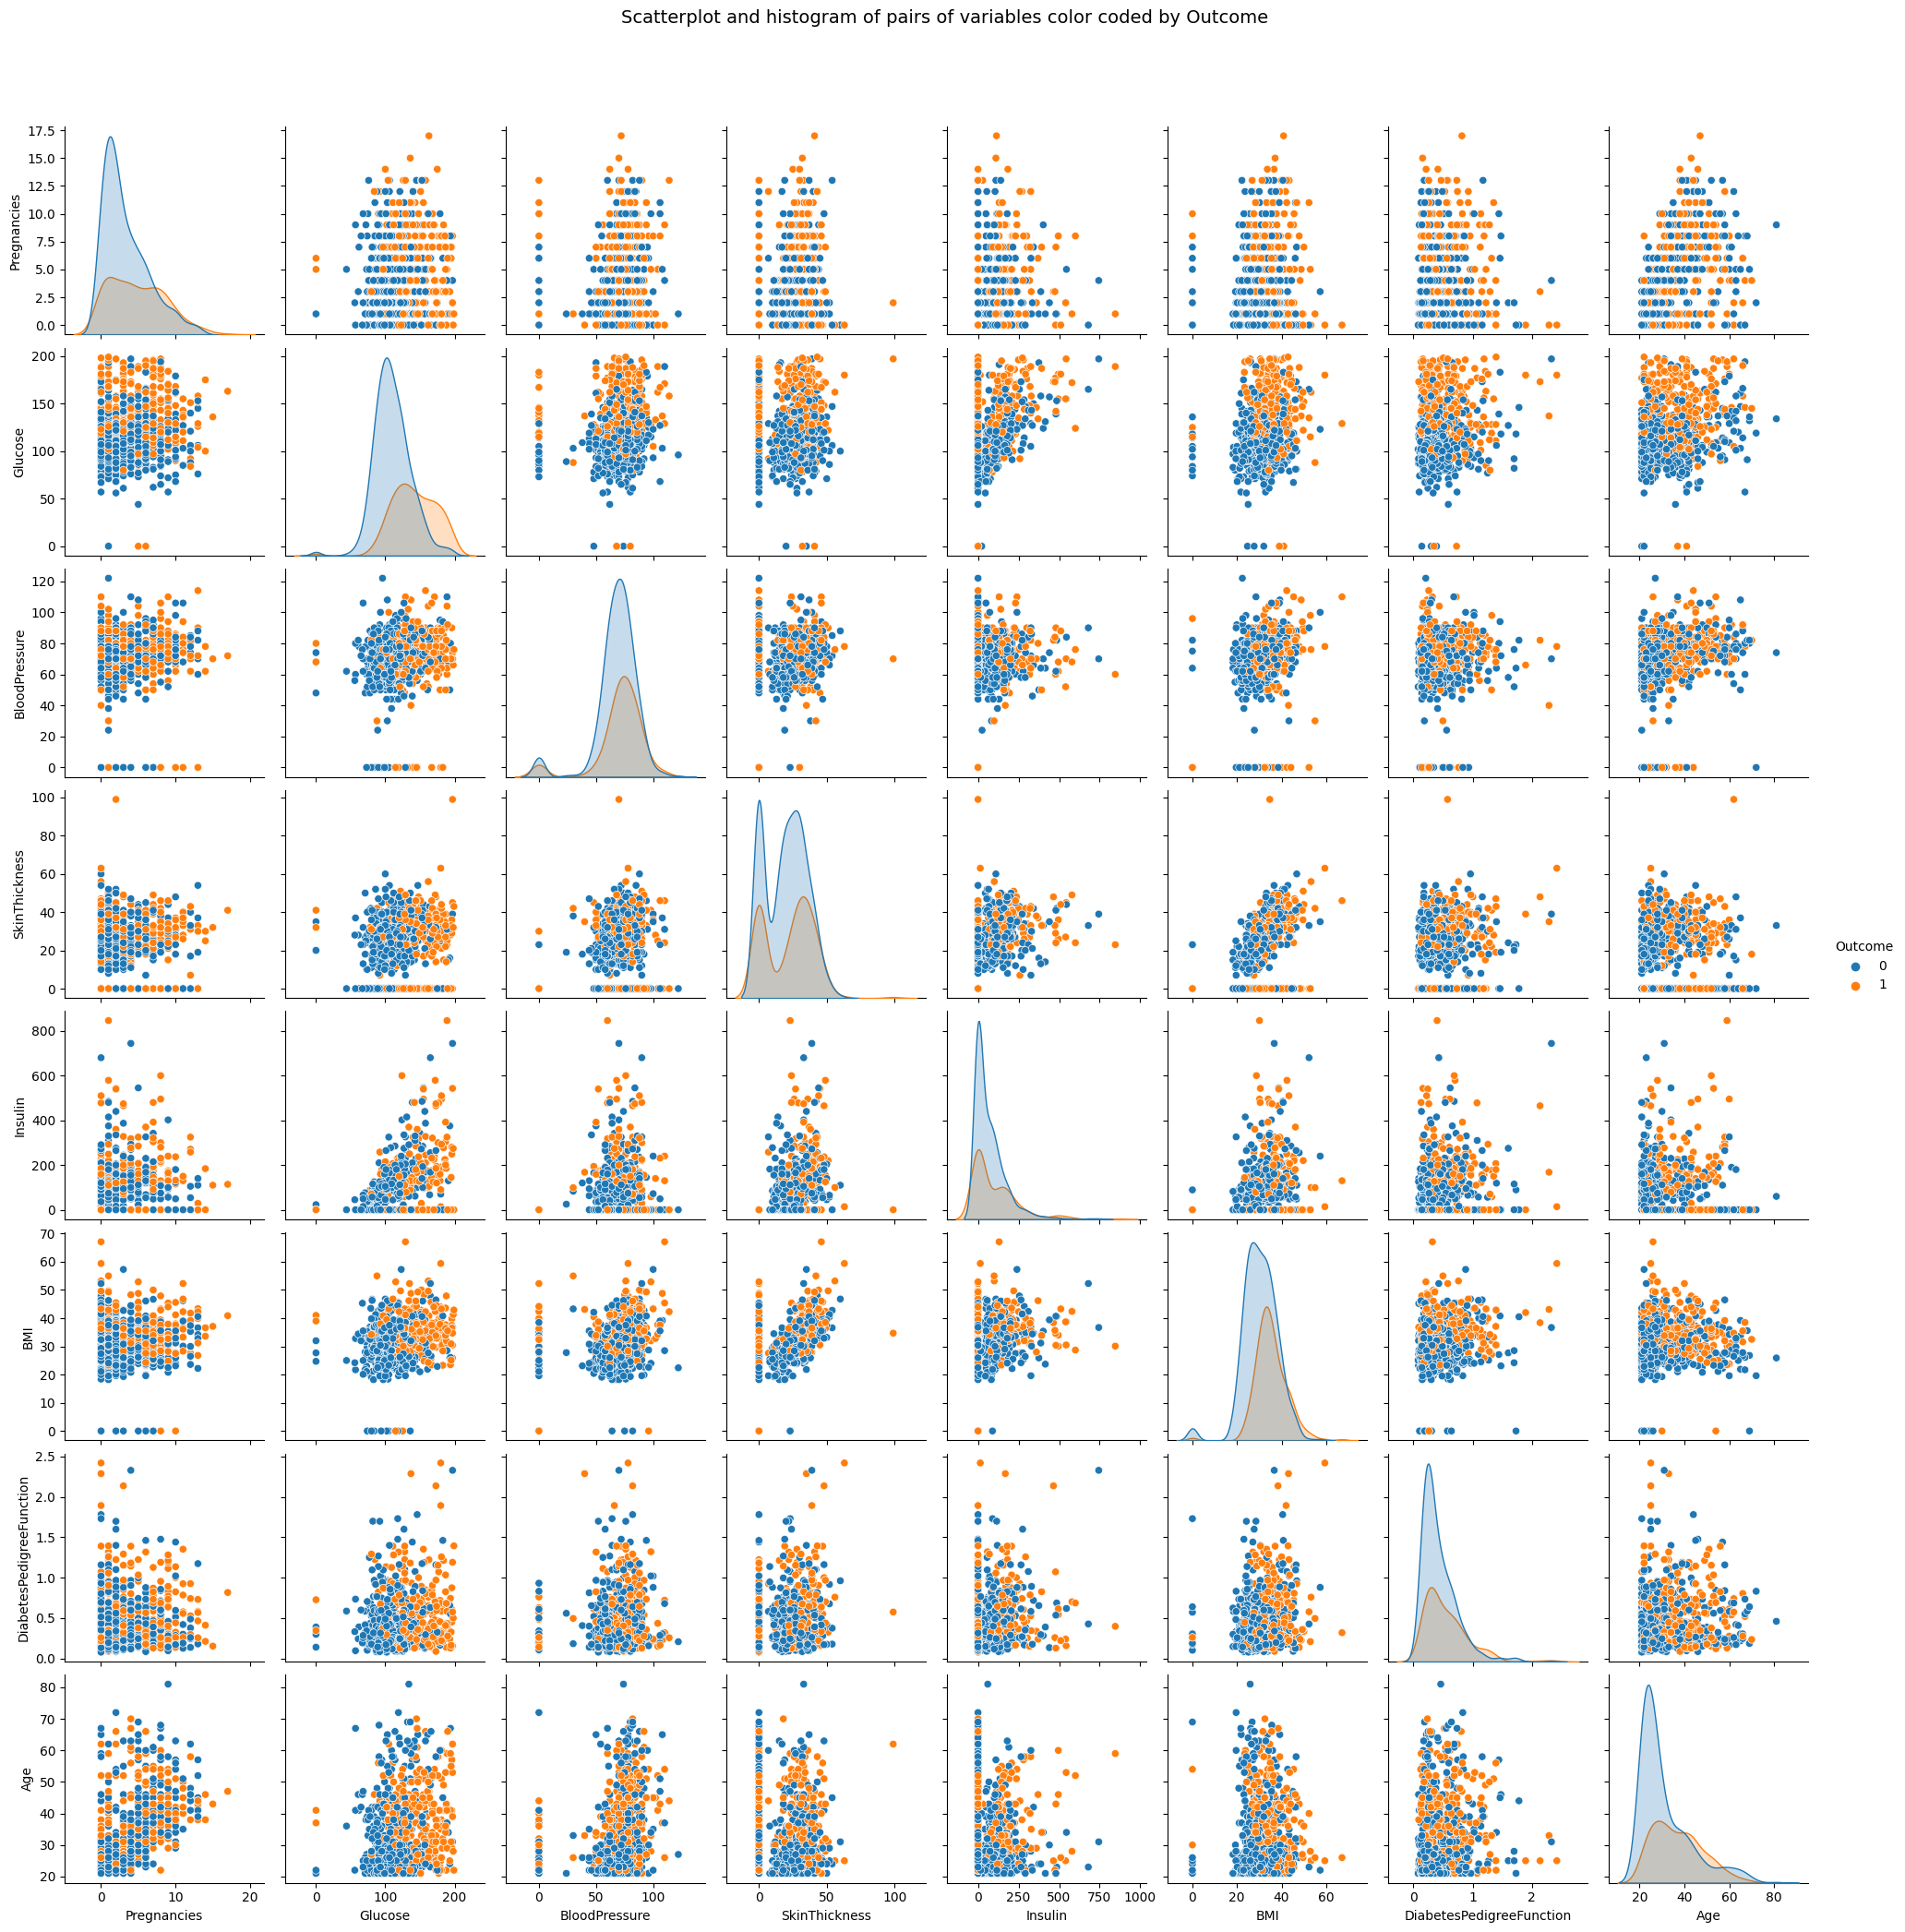

In [11]:
g = sns.pairplot(data, hue="Outcome")
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by Outcome", 
               fontsize = 14, # defining the size of the title
               y=1.05);

In [37]:
# feature columns
x = data.drop(['Outcome'], axis=1)
# taget column
y = data['Outcome']

In [15]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [66]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state = 25,
                                 oob_score=True)

In [67]:
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

#print(y_pred)

# out of bag score
print(rforest.oob_score_)

0.755700325732899


In [69]:
import numpy as np
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.7857142857142857